# Target speaker TTS from face: demonstration

First install necessary components.

In [ ]:
!git clone https://github.com/bjoernpl/ThesisFiles.git
%cd ThesisFiles
!pip install pytorch_lightning espnet_model_zoo
!pip install git+https://github.com/bjoernpl/espnet
!pip install git+https://github.com/kan-bayashi/ParallelWaveGAN
!git clone https://github.com/bjoernpl/facenet-pytorch facenet_pytorch

Download pretrained model weights:

In [ ]:
! wget https://www.dropbox.com/s/iyokqy9jmcob7nm/face_style_weights.ckpt -O  ./src/models/weights/face_style_weights.ckpt
%cd src

##  Imports

In [9]:
from pathlib import Path
import IPython
import soundfile as sf
from PIL import Image
from datetime import datetime 

from inference.face_voice_inference import FaceStyleInference
from inference.tacotron_loader import TacotronLoader

In [10]:
face_style = FaceStyleInference(
    facevoice_model_path="../src/models/weights/face_style_weights.ckpt",
    facenet_pretrained="casia-webface"
)
face_model = face_style.facestyle
baseline_tacotron, preprocess = TacotronLoader.load()


- Loaded Facestyle model from : ../src/models/weights/face_style_weights.ckpt


https://zenodo.org/record/3986237/files/tts_train_gst_tacotron2_raw_phn_tacotron_g2p_en_no_space_train.loss.best.zip?download=1: 100%|██████████| 105M/105M [00:07<00:00, 15.7MB/s]


- Loaded Tacotron2 model


Downloading...
From: https://drive.google.com/uc?id=1bqEFLgAroDcgUy5ZFP4g2O2MwcwWLEca
To: /root/.cache/parallel_wavegan/vctk_parallel_wavegan.v1.tar.gz
15.5MB [00:00, 167MB/s]


- Loaded ParallelWaveGAN


Face reference:


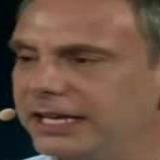

Synthesized audio


Time elapsed 0:00:00.702519


In [25]:
start_time = datetime.now() 
path = Path(f"../../qkh.jpg")
text = "This is a simple test sentence, replace it with your own sentence. Also try replacing the image."
speech, img, *_ = face_style.inference(text, path)
print("Face reference:")
IPython.display.display(IPython.display.Image(filename=str(path)))
print("Synthesized audio")
IPython.display.display(IPython.display.Audio(speech, rate=24000))
print(f'Time elapsed {(datetime.now() - start_time)}')